<a href="https://colab.research.google.com/github/juanarango220485/FSS-CNN/blob/master/Speckle_regression_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Speckle regression prediction**
With this notebook it is possible to predict the synthetic specklegrams, of a fiber specklegram sensor, with the CNN network trained for this task. You can find the synthetic dataset in [Kaggle](https://doi.org/10.34740/kaggle/dsv/3583524).<br><br>

**Authors:** *Juan Arango, Victor Aristizabal, Francisco Velez, Juan Carrasquilla, Jorge Gomez, Jairo Quijano, and Jorge Herrera-Ramirez*

### **1.** Importing libraries and dataset

In [ ]:
!git clone https://github.com/juanarango220485/FSS-CNN.git

Cloning into 'FSS-CNN'...
remote: Enumerating objects: 653, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 653 (delta 124), reused 222 (delta 124), pack-reused 431
Receiving objects: 100% (653/653), 113.65 MiB | 16.60 MiB/s, done.
Resolving deltas: 100% (394/394), done.


**NOTE:** Because it does not export correctly the "model.h5" file directly from Github, it is necessary to download it from the link https://github.com/juanarango220485/FSS-CNN/blob/0fbc203a5a01f556e92354f09d72283dbd8c5b1f/model.h5

![](https://drive.google.com/uc?export=view&id=1zjObuht_BsXxm8eHBP2VKntwmxpDPWt9)

Then you have to:

1. Upload it again and wait for it to load
2. Update Colab files

Make sure that the name of the file you upload is "model.h5 "


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image

longitud, altura = 224, 224
cnn = load_model('model.h5')
cnn.load_weights('/content/FSS-CNN/weights.h5')

#cnn.summary()                                # Uncomment to show the network model

In [ ]:
import glob, os
data = '/content/FSS-CNN/dataset'                            # folder where the speckles are
os.chdir(data)
files = []                                    # "files" is a list (of strings) that will contain each of the NAMES of the images.
for file in glob.glob("*.tiff"):              # We read all .tiff files
      files.append(file)

num_datos = 601
dim = 126 #dimension (dim, dim)
y = np.zeros(shape=[num_datos])               # We create an empty numpy array to store the corresponding temperature labels

for i in range(0,num_datos):
    ini = files[i].find('mm_')+3
    fin = files[i].find('°C')
    y[i] = float(files[i][ini:fin])           # Extracted temperature value from the string

###**2.** Predicting desired data
From 601 specklegrams we can choose in the variable 'num' (between 1 and 601)  the specklegram to select and predicted. The specklegram will be plotted and the actual and predicted temperature will be displayed.

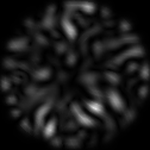

Real temperature: 68.8 °C
Pred. temperature: 70.456436 °C


In [ ]:
#-------------------------------------------------------------------------------

num = 40     # Choose data to predict (between 1 and 601)                   

# ------------------------------------------------------------------------------


I = Image.fromarray(np.asarray(load_img(files[num+1], color_mode='rgb', target_size=(dim, dim))), 'RGB')
display(I.resize((150,150), Image.LANCZOS))
img = np.zeros(shape=[1, dim, dim, 3], dtype=np.uint16)
img[0,:,:,:] = np.asarray(load_img(files[num+1], color_mode='rgb', target_size=(dim, dim)))
y_predict = cnn.predict(img)

print("Real temperature:", y[num+1], "°C")
print("Pred. temperature:", y_predict[0,0], "°C")